# 1. Install and Import Dependencies

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


# 2. Load Model

In [3]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\ariji\Desktop\Timberman\objdetectiongame\Scripts\python.exe -m pip install --upgrade pip


In [4]:
model = torch.hub.load('yolov5', 'yolov5s', source='local')

requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...

requirements: AutoUpdate success  5.1s, installed 2 packages: ['gitpython>=3.1.30', 'setuptools>=65.5.1']
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  v7.0-226-gdd9e338 Python-3.11.4 torch-2.1.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [6]:
img = './yolov5/data/images/bus.jpg'

In [7]:
results = model(img)
results.print()

image 1/1: 1080x810 4 persons, 1 bus
Speed: 49.0ms pre-process, 246.7ms inference, 13.5ms NMS per image at shape (1, 3, 640, 480)


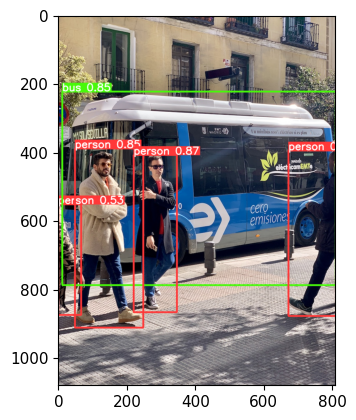

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
results.render()

[array([[[172, 148, 122],
         [170, 146, 120],
         [177, 153, 125],
         ...,
         [184, 170, 157],
         [185, 171, 158],
         [185, 171, 158]],
 
        [[177, 153, 127],
         [174, 150, 124],
         [179, 155, 127],
         ...,
         [185, 171, 158],
         [186, 172, 159],
         [186, 172, 159]],
 
        [[178, 154, 128],
         [176, 152, 126],
         [178, 154, 126],
         ...,
         [185, 171, 158],
         [185, 171, 158],
         [185, 171, 158]],
 
        ...,
 
        [[191, 185, 185],
         [188, 182, 182],
         [185, 179, 179],
         ...,
         [112, 107, 114],
         [111, 105, 115],
         [112, 106, 116]],
 
        [[163, 157, 157],
         [186, 180, 180],
         [190, 186, 185],
         ...,
         [103,  97, 107],
         [ 98,  92, 102],
         [104,  98, 108]],
 
        [[118, 112, 112],
         [166, 160, 160],
         [174, 170, 169],
         ...,
         [ 95,  89,  99],
  

# 4. Real Time Detections

In [10]:
import pyautogui

In [14]:
# Loop over the frames
while True: 
    # Take a screenshot 
    screen = pyautogui.screenshot()
    # Convert the output to a numpy array
    screen_array = np.array(screen)
    # Crop out the region we want - height, width, channels   
    cropped_region = screen_array[25:628, 1122:, :]
    # Convert the color channel order
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    
    # Make detections 
    results = model(corrected_colors)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))

    # Cv2.waitkey
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
# Close down the frame
cv2.destroyAllWindows()

# 5. Collect images for training

In [15]:
import uuid
import os
import time

In [16]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
# labels = ['left_obs', 'right_obs', 'timberman']
number_imgs = 150

In [17]:
# Loop over the frames
for img_num in range(number_imgs): 
    print('Collecting image number {}'.format(img_num))

    screen = pyautogui.screenshot()
    screen_array = np.array(screen)
    cropped_region = screen_array[25:625, 1122:, :]
    
    imgname = os.path.join(IMAGES_PATH, str(uuid.uuid1())+'.jpg')
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    cv2.imwrite(imgname, corrected_colors)

    results = model(corrected_colors)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # 2 second delay between captures
    time.sleep(0.2)

    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cv2.destroyAllWindows()

In [18]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [19]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# 6. Load Custom Model 
1. Images made into a Roboflow dataset 
2. Trained in Google Colab Notebook to utilize GPU 
3. Downloaded the trained model into local machine
4. Load the model to make real time object detection

In [2]:
model = torch.hub.load('yolov5', 'custom', source='local', path='yolov5/runs/train/yolov5s_results/weights/best.pt')

requirements: YOLOv5 requirement "gitpython" not found, attempting AutoUpdate...

requirements: 1 package updated per C:\Users\ariji\Desktop\Timberman\objdetectiongame\yolov5\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  v7.0-72-g064365d Python-3.11.4 torch-2.1.0+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7254609 parameters, 0 gradients
Adding AutoShape... 


In [5]:
img = os.path.join('data', 'images', '3329804b-67e5-11ee-8730-005056c00008.jpg')

In [6]:
results = model(img)

In [7]:
results.print()

image 1/1: 600x798 1 right_obs, 1 timberman
Speed: 67.0ms pre-process, 534.6ms inference, 24.0ms NMS per image at shape (1, 3, 512, 640)


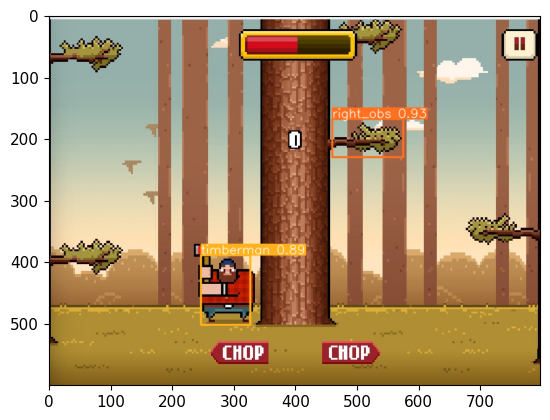

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
# Loop over the frames
while True: 
    # Take a screenshot 
    screen = pyautogui.screenshot()
    # Convert the output to a numpy array
    screen_array = np.array(screen)
    # Crop out the region we want - height, width, channels   
    cropped_region = screen_array[25:625, 1122:, :]
    # Convert the color channel order
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    
    # Make detections 
    results = model(corrected_colors)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))

    # Cv2.waitkey
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
# Close down the frame
cv2.destroyAllWindows()